# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# tips = pd.read_csv('data/tips.csv')
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

## rugplot, kdeplot, distplot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

In [6]:
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

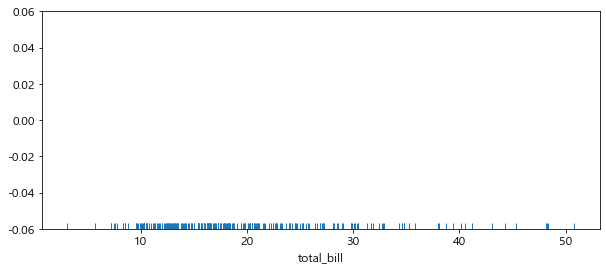

In [10]:
plt.figure(figsize=(10,4))
sns.rugplot(tips['total_bill'])
plt.show()

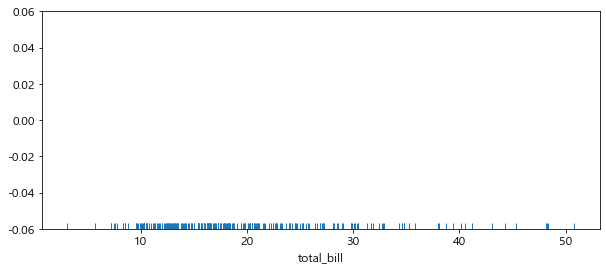

In [11]:
plt.figure(figsize=(10,4))
sns.rugplot('total_bill', data=tips)
plt.show()
# 컬럼명: 문자열
# data: DataFrame객체

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

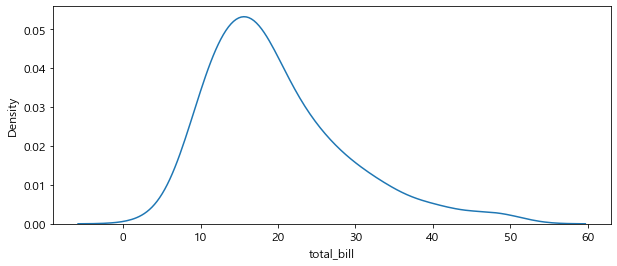

In [14]:
plt.figure(figsize=(10,4))
# sns.kdeplot(tips['total_bill'])
sns.kdeplot('total_bill', data=tips)
plt.show()

### distplot
- 히스토그램에 kdeplot, rugplot 한번에 그린다.
    - kdeplot은 default로 나오고 rugplot은 default로 안나온다.

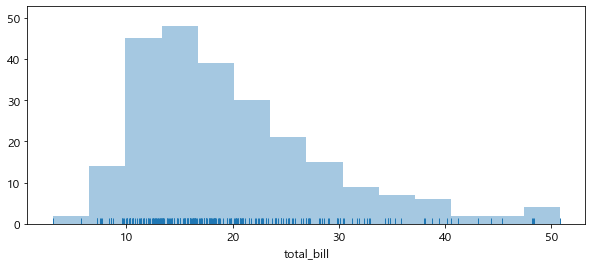

In [34]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(10,4))
sns.distplot(tips['total_bill'], 
             hist=True,
             kde=False,
             rug=True)
plt.show()
# distplot은 dataframe과 컬럼을 나눠서 지정 못 함

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

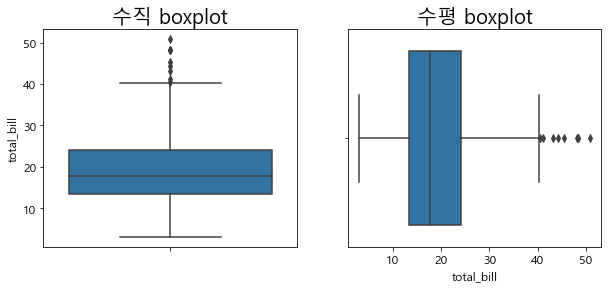

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(y=tips['total_bill'])  #수직
plt.title('수직 boxplot')

plt.subplot(1,2,2)
sns.boxplot(x="total_bill", data=tips)
plt.title('수평 boxplot')

plt.show()

In [27]:
tips['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [31]:
yes = tips[tips['smoker'=='Yes']['total_bill']
no = tips[tips['smoker']=='No']['total_bill']

SyntaxError: invalid syntax (<ipython-input-31-b0d2df8b1f3e>, line 2)

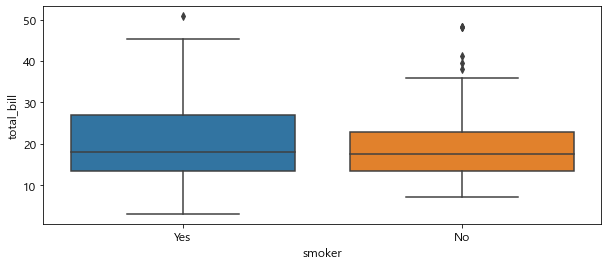

In [30]:
plt.figure(figsize=(10,4))

sns.boxplot(y='total_bill', x='smoker', data=tips)

# x(y)축: 분포를 보려는 연속형 값의 컬럼, y(x)축: 그룹을 나누려는 범주형 컬럼
plt.show()

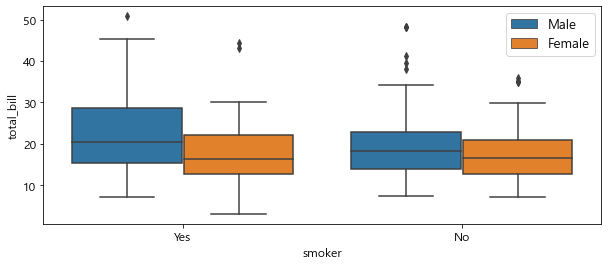

In [52]:
plt.figure(figsize=(10,4))

sns.boxplot(y='total_bill', x='smoker', hue='sex', data=tips)
plt.legend(fontsize=13)

plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

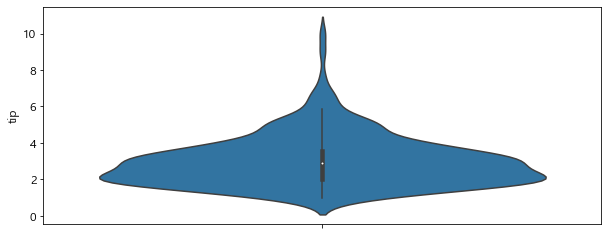

In [36]:
plt.figure(figsize=(10,4))
sns.violinplot(y='tip', data=tips)
plt.show()

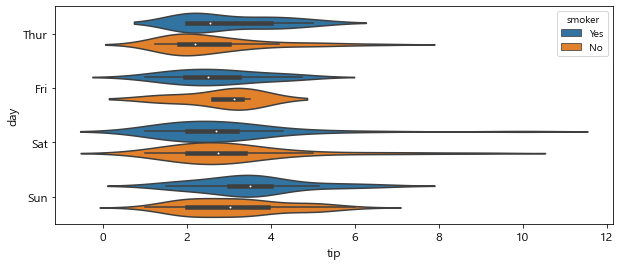

In [39]:
# 요일별 tip의 분포
plt.figure(figsize=(10,4))
# sns.violinplot(y='tip', x='day', data=tips) 
# sns.violinplot(y='tip', x='day', hue='smoker', data=tips) #요일-흡연여부
sns.violinplot(x='tip', y='day', hue='smoker', data=tips)
plt.show()

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

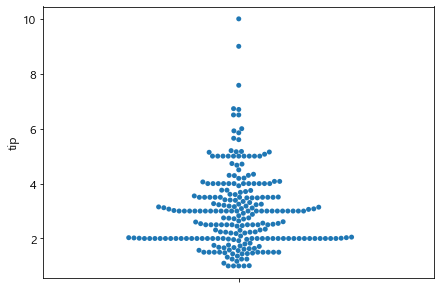

In [41]:
plt.figure(figsize=(7,5))
sns.swarmplot(y='tip', data=tips)
plt.show()

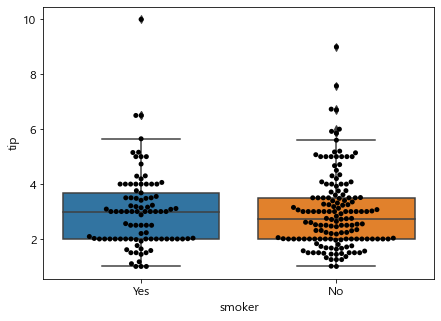

In [44]:
plt.figure(figsize=(7,5))

sns.boxplot(x='smoker', y='tip', data=tips)
sns.swarmplot(x='smoker', y='tip', data=tips, color='black')

plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

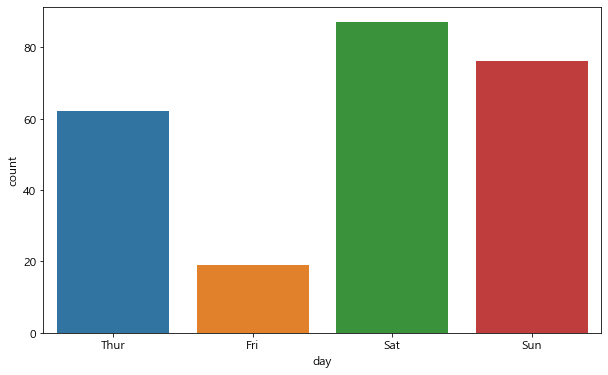

In [45]:
plt.figure(figsize=(10,6))

# 범주형 컬럼을 지정하면 고유값 별로 개수를 세서 막대 그래프를 그려줌
sns.countplot(x='day', data=tips)
plt.show()

In [46]:
tips['day']

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

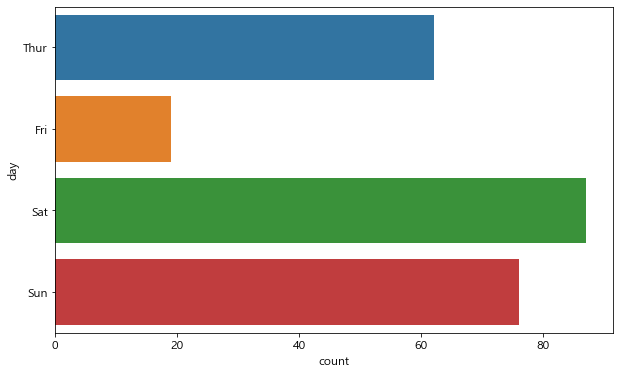

In [48]:
plt.figure(figsize=(10,6))

# 범주형 컬럼을 지정하면 고유값 별로 개수를 세서 막대 그래프를 그려줌
sns.countplot(y='day', data=tips)
plt.show()

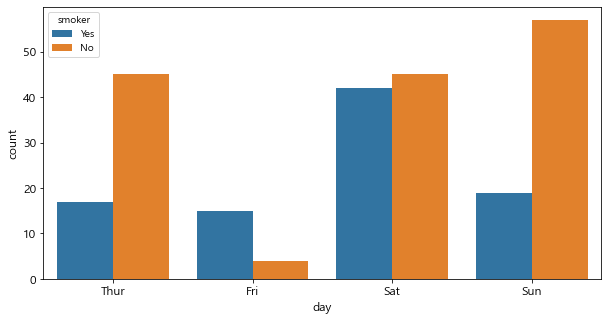

In [49]:
# 요일별 - 흡연여부 별로
plt.figure(figsize=(10,5))

sns.countplot(x='day', hue='smoker', data=tips)

plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [53]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='total_bill', y='tip', date=tips, alpha=0.5)
plt.show()

ValueError: Could not interpret value `total_bill` for parameter `x`

<Figure size 720x288 with 0 Axes>

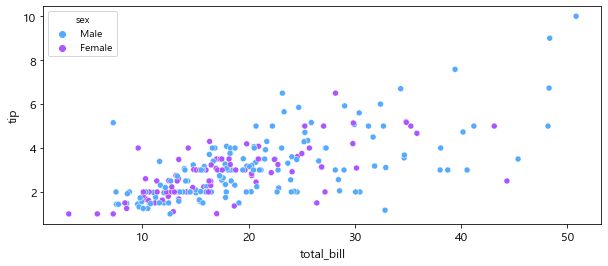

In [55]:
# 성별로 나눠서 확인
plt.figure(figsize=(10,4))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips, palette='cool')
plt.show()

In [56]:
tips[['total_bill', 'tip']]

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.

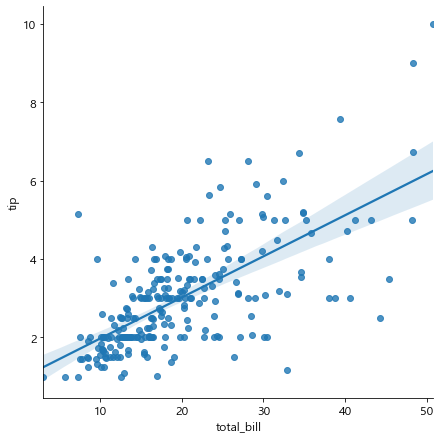

In [60]:
sns.lmplot(x='total_bill', y='tip', data=tips, height=6)
plt.show()

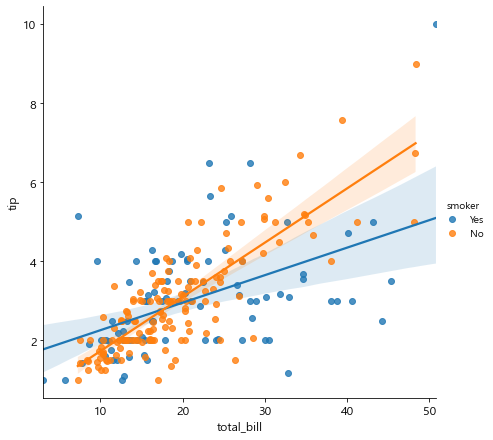

In [62]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, height=6)
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

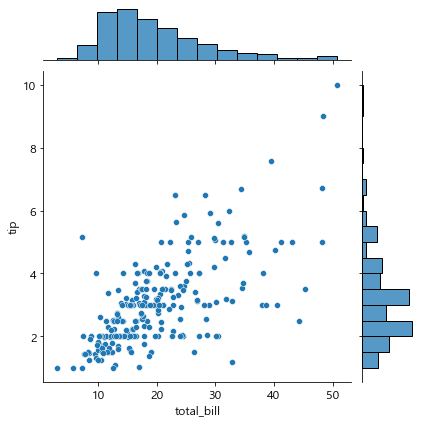

In [63]:
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

In [64]:
tips.select_dtypes(include='number')

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


### paireplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

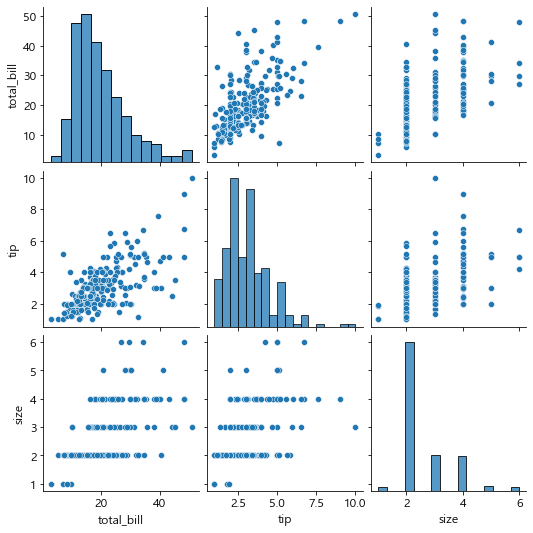

In [65]:
sns.pairplot(tips)
plt.show()

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [66]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

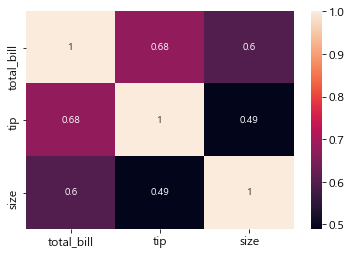

In [68]:
sns.heatmap(tips.corr(), annot=True)

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [69]:
index = pd.date_range('2021/1/1', freq='D', periods=10)
value = np.random.randint(1, 100, size=(10,3))
df = pd.DataFrame(value, index=index,  columns=list('ABC'))
df.head(3)

,A,B,C
2021-01-01,52,21,79
2021-01-02,69,46,2
2021-01-03,26,50,9


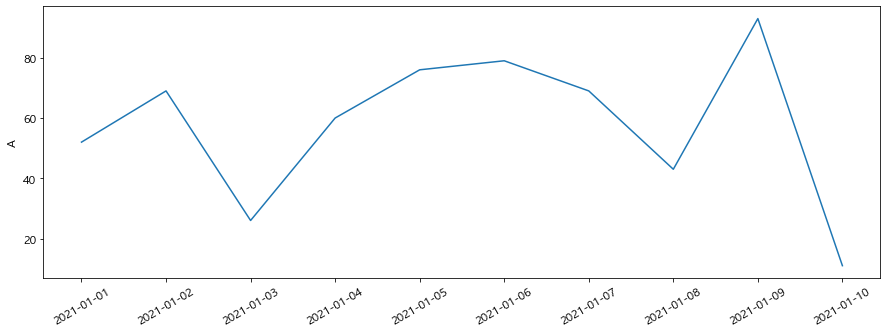

In [72]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.index, y="A", data=df)
plt.xticks(df.index, rotation=30)
plt.show()